In [51]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from dotenv import load_dotenv

from sqlalchemy import create_engine

load_dotenv()
engine = create_engine(f"mysql+pymysql://{os.getenv('DB_USER')}:{os.getenv('DB_PASSWORD')}@{os.getenv('DB_HOST')}/{os.getenv('DB_NAME')}")
import warnings

pd.options.display.max_columns = None
warnings.filterwarnings("ignore")
%matplotlib inline

In [52]:
# df = pd.read_sql("SELECT * FROM `datalog_ilapak3`", engine, parse_dates=['times'])
df = pd.read_csv("raw.csv", index_col=0, parse_dates=["times"])
df.drop(columns=["id"], inplace=True)
df.head()

,times,Shift,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC ),Counter Output (pack),Counter Reject (pack),Speed(rpm),Availability(%),Performance(%),Quality(%),OEE(%),Jaws Position,Knife Position,Pump Position Stop,Doser Drive Enable,Sealing Enable,Machine Alarm,Downtime (hh:mm:ss),Output Time (hh:mm:ss),Total Time (hh:mm:ss)
0,2024-01-29 09:23:18,1,1,199.0,234.0,234.0,199.0,22908,48103988,73.0,34.0,98.0,98.0,33.0,1,0,0,0,0,0,00:18:58,00:53:19,02:35:05
1,2024-01-29 09:28:18,1,1,199.0,234.0,234.0,199.0,25152,48169524,74.0,36.0,98.0,98.0,35.0,1,0,0,0,0,0,00:18:58,00:58:19,02:40:06
2,2024-01-29 09:33:18,1,1,199.0,234.0,234.0,198.0,25890,46465972,71.0,38.0,94.0,96.0,35.0,1,0,0,1,1,1,00:19:10,01:03:07,02:45:06
3,2024-01-29 09:38:18,1,1,199.0,234.0,234.0,199.0,28140,46662580,71.0,40.0,95.0,97.0,37.0,1,0,0,0,0,1,00:19:10,01:08:07,02:50:06
4,2024-01-29 09:47:17,1,1,199.0,234.0,234.0,199.0,32178,46924724,72.0,43.0,95.0,97.0,40.0,1,0,0,1,1,1,00:19:10,01:17:07,02:59:05


# Preprocessing

In [53]:
# Pastikan kolom dalam format string waktu (hh:mm:ss)
time_cols = ["Downtime (hh:mm:ss)", "Output Time (hh:mm:ss)", "Total Time (hh:mm:ss)"]

for col in time_cols:
    df[col.split(" (")[0] + "_sec"] = pd.to_timedelta(df[col]).dt.total_seconds()

for col in ['Downtime_sec', 'Output Time_sec', 'Total Time_sec']:
    df[f'delta_{col}'] = df[col].diff().fillna(0)

In [54]:
# drop original time columns 
df.drop(columns=time_cols, inplace=True)
df.head(5)

,times,Shift,Status,Suhu Sealing Vertikal Bawah (oC),Suhu Sealing Vertical Atas (oC),Suhu Sealing Horizontal Depan/Kanan (oC),Suhu Sealing Horizontal Belakang/Kiri (oC ),Counter Output (pack),Counter Reject (pack),Speed(rpm),Availability(%),Performance(%),Quality(%),OEE(%),Jaws Position,Knife Position,Pump Position Stop,Doser Drive Enable,Sealing Enable,Machine Alarm,Downtime_sec,Output Time_sec,Total Time_sec,delta_Downtime_sec,delta_Output Time_sec,delta_Total Time_sec
0,2024-01-29 09:23:18,1,1,199.0,234.0,234.0,199.0,22908,48103988,73.0,34.0,98.0,98.0,33.0,1,0,0,0,0,0,1138.0,3199.0,9305.0,0.0,0.0,0.0
1,2024-01-29 09:28:18,1,1,199.0,234.0,234.0,199.0,25152,48169524,74.0,36.0,98.0,98.0,35.0,1,0,0,0,0,0,1138.0,3499.0,9606.0,0.0,300.0,301.0
2,2024-01-29 09:33:18,1,1,199.0,234.0,234.0,198.0,25890,46465972,71.0,38.0,94.0,96.0,35.0,1,0,0,1,1,1,1150.0,3787.0,9906.0,12.0,288.0,300.0
3,2024-01-29 09:38:18,1,1,199.0,234.0,234.0,199.0,28140,46662580,71.0,40.0,95.0,97.0,37.0,1,0,0,0,0,1,1150.0,4087.0,10206.0,0.0,300.0,300.0
4,2024-01-29 09:47:17,1,1,199.0,234.0,234.0,199.0,32178,46924724,72.0,43.0,95.0,97.0,40.0,1,0,0,1,1,1,1150.0,4627.0,10745.0,0.0,540.0,539.0


## Marking for column Condition

In [55]:
"""
-1 = Excluded
0 = Normal
1 = Warning
2 = Leak
"""

sealing_cols = [
    'Suhu Sealing Vertikal Bawah (oC)',
    'Suhu Sealing Vertical Atas (oC)',
    'Suhu Sealing Horizontal Depan/Kanan (oC)',
    'Suhu Sealing Horizontal Belakang/Kiri (oC )'
]

# Inisialisasi
df["Condition"] = -1  # default = Excluded

# Hitung delta reject
df["delta_reject"] = df["Counter Reject (pack)"].diff().fillna(0)

# 0 = Normal: Saat mesin jalan dan reject tidak bertambah
normal_mask = (df["Status"] == 2) & (df["delta_reject"] == 0)
df.loc[normal_mask, "Condition"] = 0

# 2 = Leak: Saat mesin jalan dan reject naik
leak_mask = (df["Status"] == 2) & (df["delta_reject"] > 0)
df.loc[leak_mask, "Condition"] = 2

# 1 = Warning: 5 baris sebelum leak jika suhu atau speed berubah
leak_timestamps = df[leak_mask].index

for ts in leak_timestamps:
    idx = df.index.get_loc(ts)
    start_idx = max(0, idx - 5)
    end_idx = idx 

    window_df = df.iloc[start_idx:end_idx]

    # Deteksi perubahan suhu dan speed dalam window
    temp_diff_any = window_df[sealing_cols].diff().fillna(0).ne(0).any(axis=1)
    speed_diff_any = window_df["Speed(rpm)"].diff().fillna(0).ne(0)
    warning_mask = temp_diff_any | speed_diff_any

    warning_indices = window_df[warning_mask].index

    # Set sebagai Warning hanya jika sebelumnya Excluded (-1)
    df.loc[warning_indices, "Condition"] = df.loc[warning_indices, "Condition"].replace(-1, 1)  

| Condition       | Kriteria                                               |
| --------------- | ------------------------------------------------------ |
| `0 = Normal`    | `Status == 2` **dan** `delta_reject == 0`              |
| `2 = Leak`      | `Status == 2` **dan** `delta_reject > 0`               |
| `1 = Warning`   | 5 baris sebelum Leak, **jika suhu atau speed berubah** |
| `-1 = Excluded` | Semua yang tidak masuk kriteria di atas                |

<Axes: xlabel='Condition', ylabel='count'>

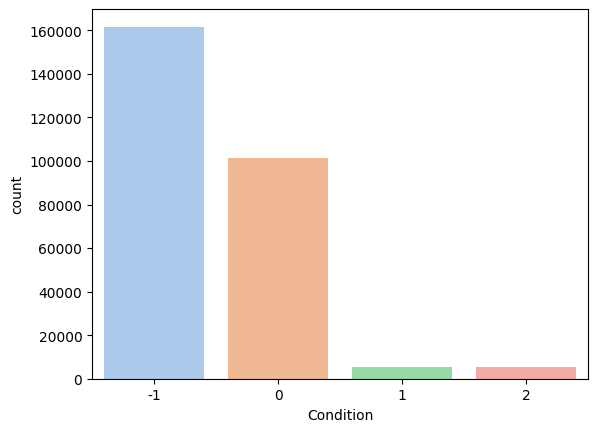

In [56]:
sns.countplot(data=df, x="Condition", palette='pastel')

In [57]:
df[df["Condition"] == 0].to_csv("data_normal.csv", index=False)

# I. Quick EDA

## I.a Outliers Analysis

### Numeric Columns

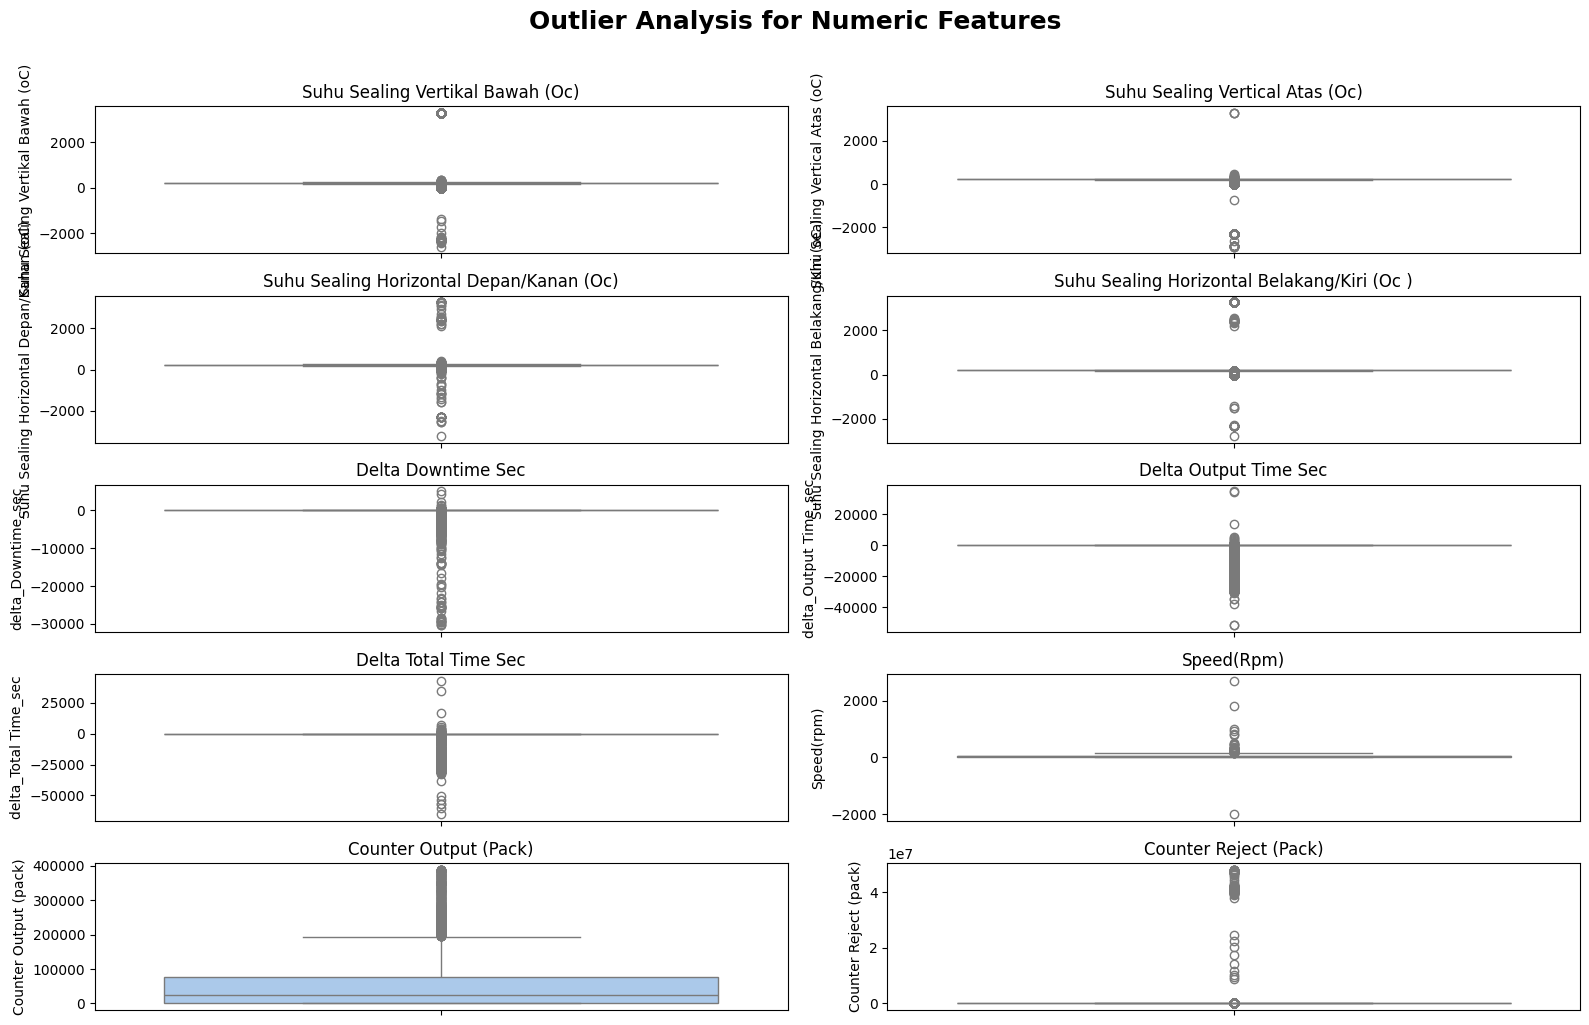

In [58]:
numeric_cols = [
    'Suhu Sealing Vertikal Bawah (oC)',
    'Suhu Sealing Vertical Atas (oC)',
    'Suhu Sealing Horizontal Depan/Kanan (oC)',
    'Suhu Sealing Horizontal Belakang/Kiri (oC )',
    'delta_Downtime_sec', 'delta_Output Time_sec',
    'delta_Total Time_sec',
    'Speed(rpm)',
    'Counter Output (pack)',
    'Counter Reject (pack)'
]

plt.figure(figsize=(16, 10))
plt.suptitle("Outlier Analysis for Numeric Features", fontsize=18, weight='bold', y=1.02)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=df[col], color=sns.color_palette("pastel")[0])
    plt.title(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

In [59]:
df_cleaned = df.copy()
print(f"Shape before outlier removal: {df_cleaned.shape}")

for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Shape after outlier removal: {df_cleaned.shape}")
print(f"Percentage of data removed: {1 - df_cleaned.shape[0] / df.shape[0]:.2%}")

Shape before outlier removal: (273995, 28)
Shape after outlier removal: (166434, 28)
Percentage of data removed: 39.26%


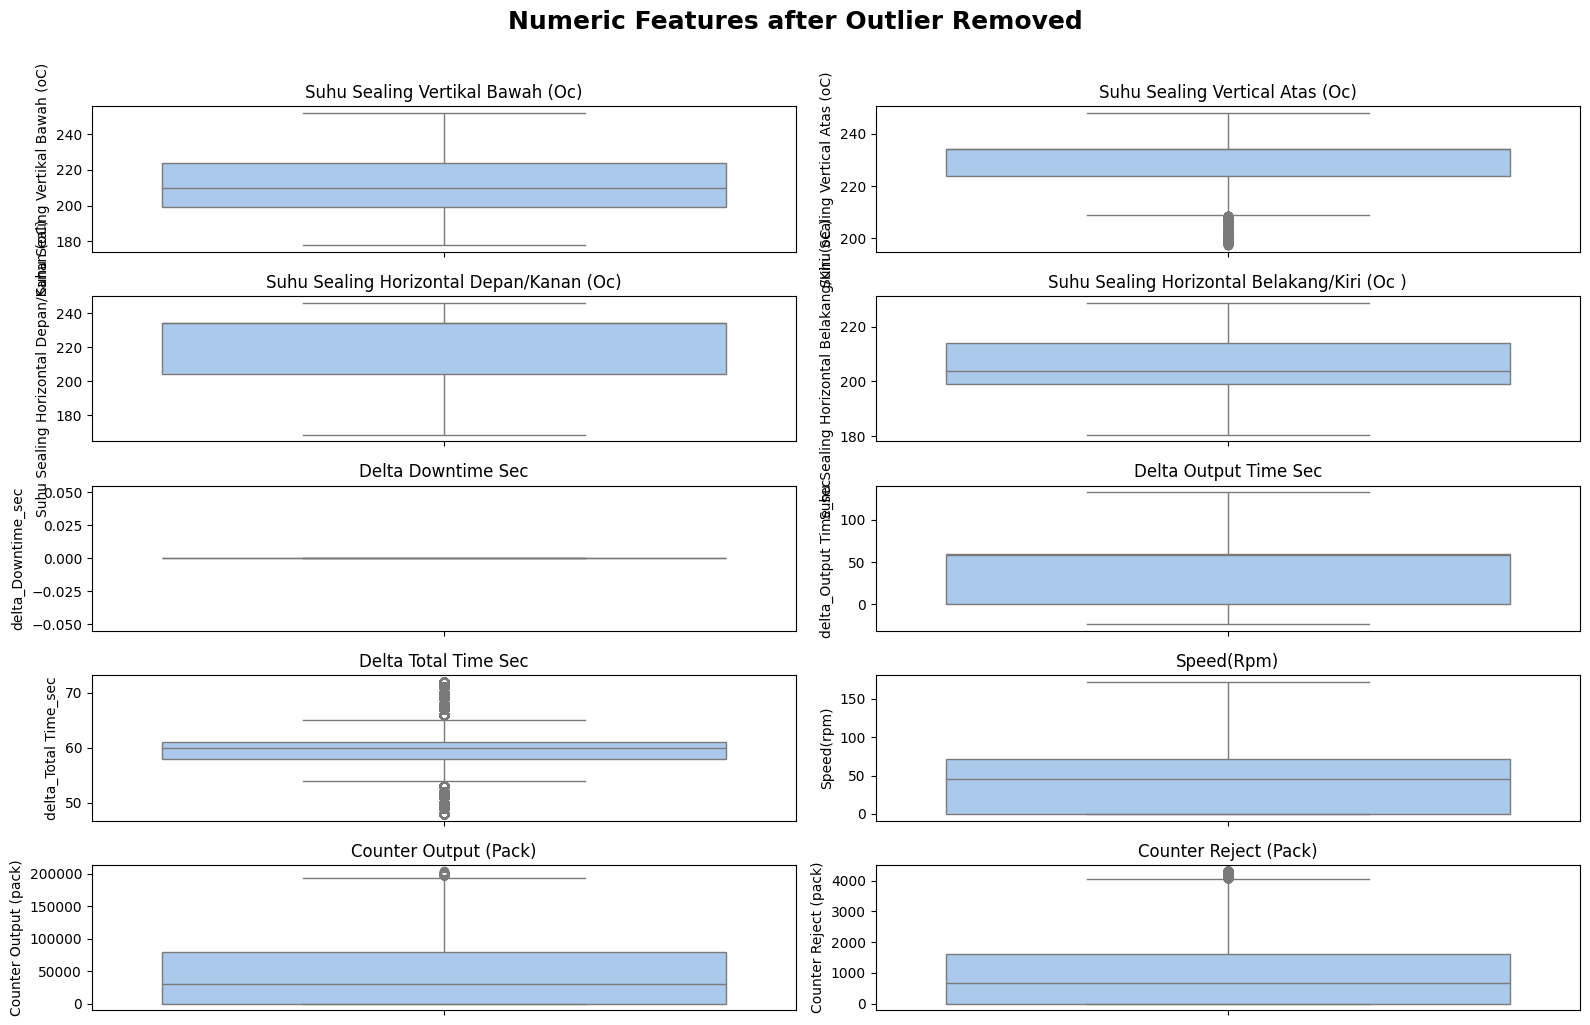

In [60]:
plt.figure(figsize=(16, 10))
plt.suptitle("Numeric Features after Outlier Removed", fontsize=18, weight='bold', y=1.02)

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=df_cleaned[col], color=sns.color_palette("pastel")[0])
    plt.title(col.replace('_', ' ').title(), fontsize=12)

plt.tight_layout()
plt.show()

In [61]:
# Drop unnecessary columns because they are not needed for further analysis
df_cleaned.drop(columns=["Knife Position", "Pump Position Stop"], inplace=True)
df_cleaned = df_cleaned[(df_cleaned["Status"] != 0) & (df_cleaned["Shift"] != 0)]

### Distribution of Binary Columns

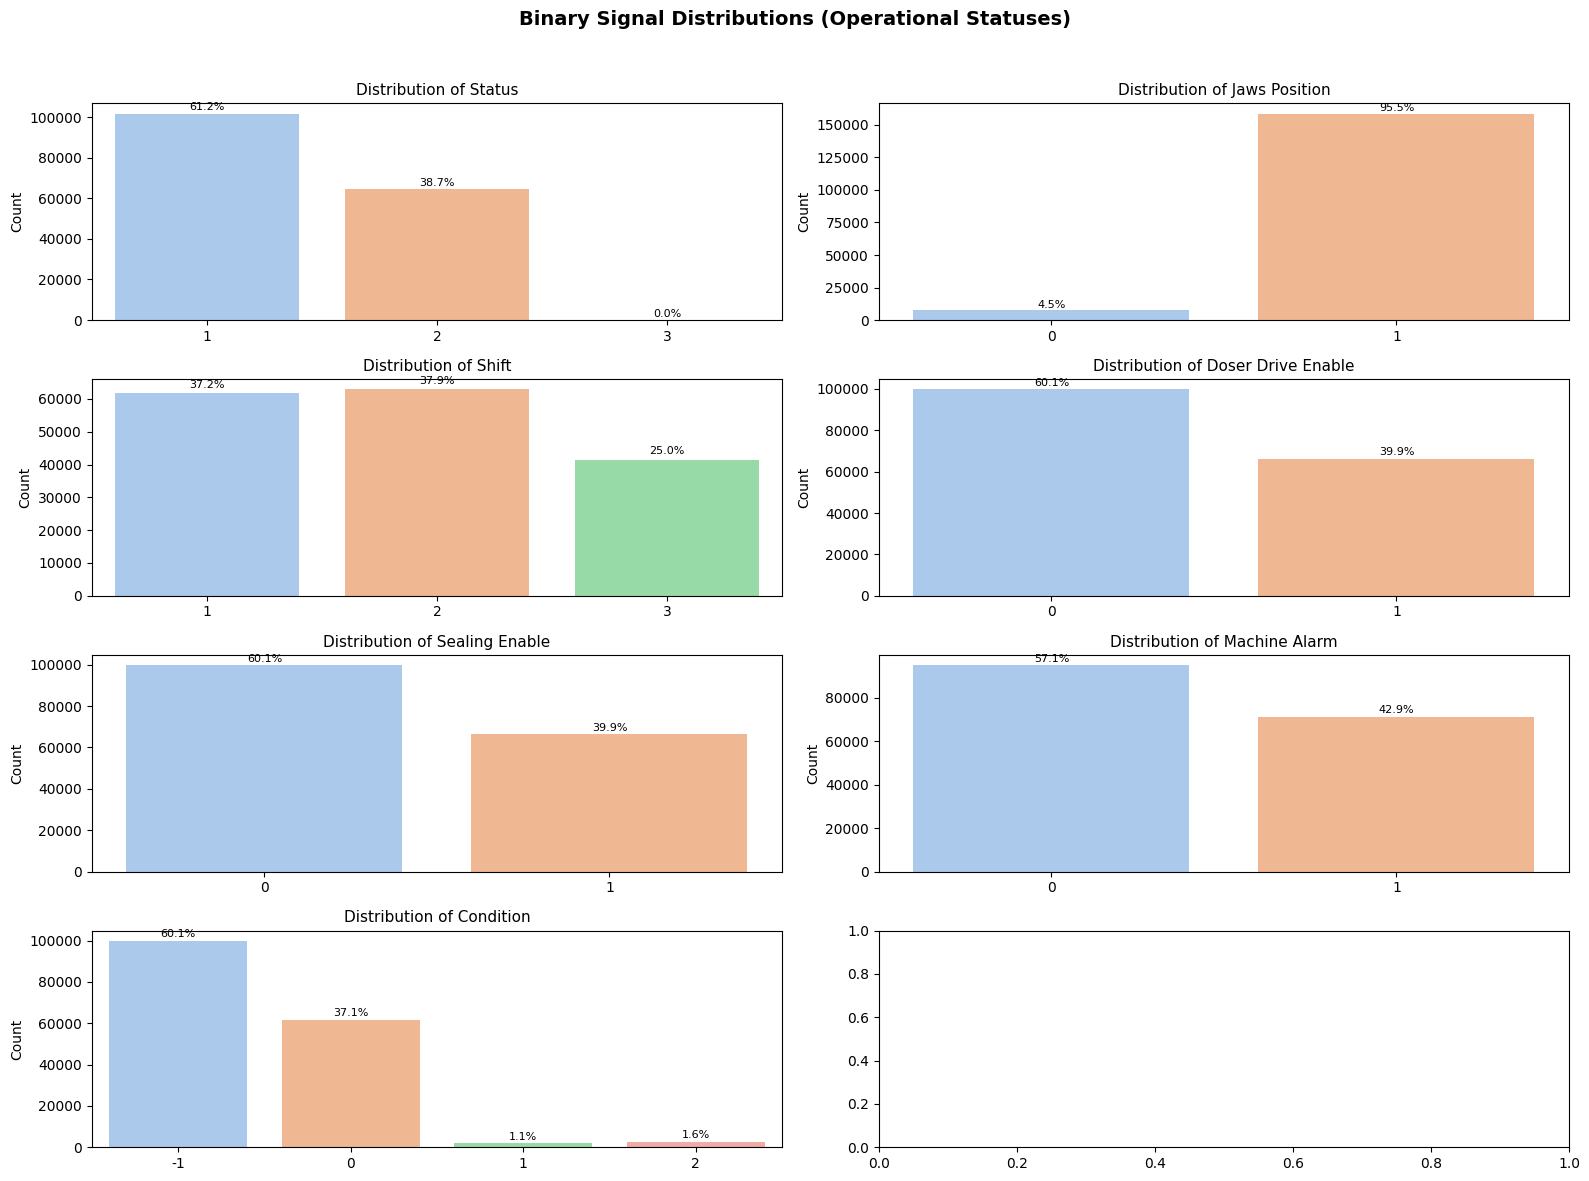

In [62]:
binary_cols = [
    'Status', 'Jaws Position', 'Shift',
    'Doser Drive Enable',
    'Sealing Enable', 'Machine Alarm',
    'Condition'
]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(binary_cols):
    ax = axes[i]
    sns.countplot(data=df_cleaned, x=col, ax=ax, palette='pastel')

    total = len(df_cleaned)
    for p in ax.patches:
        count = p.get_height()
        percentage = f'{100 * count / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = count
        ax.text(x, y + total * 0.01, percentage, ha='center', fontsize=8)

    ax.set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.suptitle('Binary Signal Distributions (Operational Statuses)', fontsize=14, weight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

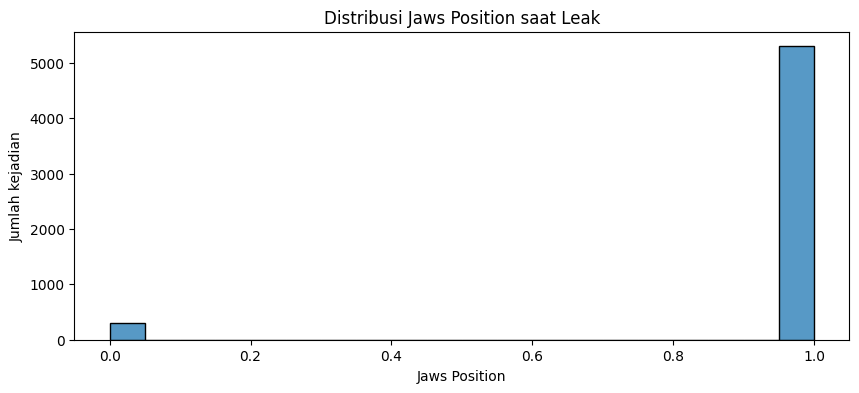

In [63]:
leak_df = df[df['Condition'] == 2]


plt.figure(figsize=(10, 4))
sns.histplot(leak_df['Jaws Position'], bins=20, kde=False)
plt.title('Distribusi Jaws Position saat Leak')
plt.xlabel('Jaws Position')
plt.ylabel('Jumlah kejadian')
plt.show()

### Correlation Matrix

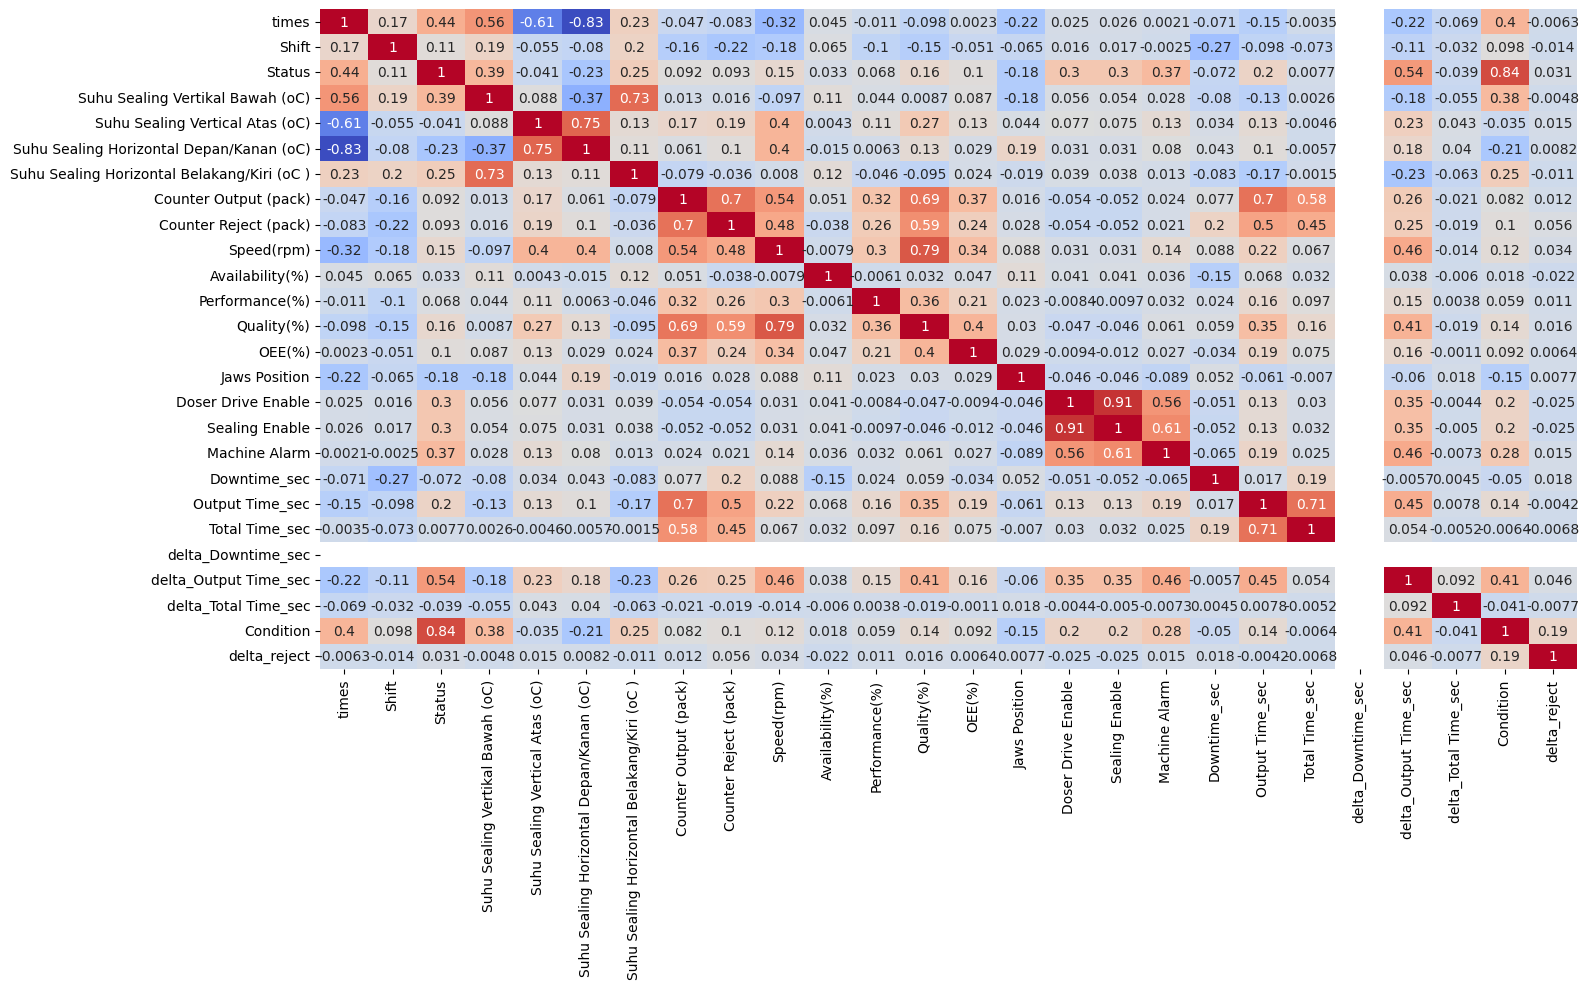

In [64]:
plt.figure(figsize=(16, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", cbar=False)
plt.tight_layout()

# EDA

In [65]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Bagaimana Kondisi 10 menit sebelum terjadi leakage dan 10 menit sesudah leakage?

In [66]:
LEAK_CONDITION = 2

def plot_leakage_trends(df, leak_condition=LEAK_CONDITION, n_points=100, sample=1, cols=None):
    
    leak_indices = df[df["Condition"] == leak_condition].index.sort_values(ascending=False).tolist()
    
    if not leak_indices:
        print(f"Tidak ada data dengan condition {leak_condition}")
        return None
    
    print(f"Ditemukan {len(leak_indices)} titik leakage")
    
    valid_leak_indices = []
    for idx in leak_indices:
        if (idx >= n_points) and (idx < len(df) - n_points):
            valid_leak_indices.append(idx)
    
    if not valid_leak_indices:
        print(f"Tidak ada leakage dengan {n_points} data sebelum dan sesudah")
        return None
    
    print(f"Valid leakage points: {len(valid_leak_indices)}")
    
    selected_leaks = valid_leak_indices[:sample]
    print(f"Selected leakage points: {len(selected_leaks)}")
    
    total_rows = len(cols) * len(selected_leaks)
    
    subplot_titles = []
    for leak_num, leak_idx in enumerate(selected_leaks):
        leak_time = df.iloc[leak_idx]['times']
        for col in cols:
            subplot_titles.append(f"Leak {leak_num+1} - {col}<br><sub>Time: {leak_time}</sub>")
    
    fig = make_subplots(
        rows=total_rows, cols=1, 
        shared_xaxes=True,
        vertical_spacing=0.02,
        subplot_titles=subplot_titles
    )
    
    # 5. Plot untuk setiap leak sample
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for leak_num, leak_idx in enumerate(selected_leaks):
        start_idx = leak_idx - n_points
        end_idx = leak_idx + n_points + 1
        subset_data = df.iloc[start_idx:end_idx].copy()
        subset_data['relative_time'] = range(-n_points, n_points + 1)
        
        for i, col in enumerate(cols):
            current_row = leak_num * len(cols) + i + 1
            color = colors[leak_num % len(colors)]
            
            # Plot line
            fig.add_trace(
                go.Scatter(
                    x=subset_data['relative_time'],
                    y=subset_data[col],
                    mode='lines+markers',
                    name=f'Leak {leak_num+1} - {col}',
                    line=dict(width=2, color=color),
                    marker=dict(size=3, color=color),
                    showlegend=False
                ),
                row=current_row, col=1
            )
            
            fig.add_vrect(
                x0=-n_points, x1=0,
                fillcolor="lightblue", opacity=0.15,
                layer="below", row=current_row, col=1
            )
            
            fig.add_vline(
                x=0, line_width=2, line_dash="dash", line_color="red",
                row=current_row, col=1
            )
            
            fig.add_vrect(
                x0=0, x1=n_points,
                fillcolor="lightcoral", opacity=0.15,
                layer="below", row=current_row, col=1
            )
            
            if leak_num == 0:
                fig.add_annotation(
                    x=-n_points/2, y=subset_data[col].max(),
                    text="Before Leak", showarrow=False,
                    font=dict(size=10, color="blue"),
                    row=current_row, col=1
                )
                fig.add_annotation(
                    x=n_points/2, y=subset_data[col].max(),
                    text="After Leak", showarrow=False,
                    font=dict(size=10, color="red"),
                    row=current_row, col=1
                )
    
    # 6. Update layout
    fig.update_layout(
        height=200 * total_rows,
        width=1400,
        title_text=f"Temperature Trends: {n_points} Points Before and After Leakage<br>" +
                  f"Showing {len(selected_leaks)} Leakage Sample(s)",
        showlegend=False,
        font=dict(size=10)
    )
    
    fig.update_yaxes(title_text="°C", title_font_size=10)
    fig.update_xaxes(title_text="Relative Time (0 = Leak Point)", title_font_size=10)
    
    return fig, selected_leaks

In [67]:
# Split for training and testing
train_size = int(len(df_cleaned) * 0.8)
df_train = df_cleaned.iloc[:train_size]
df_test = df_cleaned.iloc[train_size:]

# Plot leakage trends for training data
fig, selected_leaks = plot_leakage_trends(
    df_train, 
    leak_condition=LEAK_CONDITION, 
    n_points=10, 
    sample=5, 
    cols=sealing_cols
)
if fig:
    fig.show()

Ditemukan 2027 titik leakage
Valid leakage points: 976
Selected leakage points: 5


In [68]:
# Drop delta downtime
df_train.drop(columns=["delta_Downtime_sec"], inplace=True)
df_test.drop(columns=["delta_Downtime_sec"], inplace=True)

df_train.to_csv("data/train.csv", index=False)
df_test.to_csv("data/test.csv", index=False)